In [ ]:
import numpy as np
np.random.seed(10)

import pandas as pd

train = pd.DataFrame(pd.read_csv('train.csv', index_col=[0], header=0))
test  = pd.DataFrame(pd.read_csv('test.csv', index_col=[0], header=0))
display(train.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
display(train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
train['SibSp'].fillna(-1, inplace=True)
train['Parch'].fillna(-1, inplace=True)

test['Age'].fillna(train['Age'].mean(), inplace=True)
test['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['SibSp'].fillna(-1, inplace=True)
test['Parch'].fillna(-1, inplace=True)

In [ ]:
train = pd.get_dummies(train, dummy_na=True, columns=['Pclass', 'Sex', 'Embarked']).astype(float)
test = pd.get_dummies(test, dummy_na=True, columns=['Pclass', 'Sex', 'Embarked']).astype(float)

display(train.head())
display(test.head())

,Survived,Age,SibSp,Parch,Fare,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
PassengerId,,,,,,,,,,,,,,,,
1,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,Age,SibSp,Parch,Fare,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
PassengerId,,,,,,,,,,,,,,,
892,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
893,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
894,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
895,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
896,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = train.drop(columns=["Survived"])[:-120]
y_train = train["Survived"][:-120]

X_val = train.drop(columns=["Survived"])[-120:]
y_val = train["Survived"][-120:]

X_test = test

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ",   X_val.shape)
print("y_val: ",   y_val.shape)
print("X_test: ",   X_test.shape)

X_train:  (771, 15)
y_train:  (771,)
X_val:  (120, 15)
y_val:  (120,)
X_test:  (418, 15)


In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 545 (2.13 KB)
Trainable params: 545 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import time

epochs = 1000
start_time = time.time()

history = model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=epochs, batch_size=32,
                    validation_data=(X_val.to_numpy(), y_val.to_numpy()), verbose=0, shuffle=True)

print("Tempo gasto: %d segundos" % (time.time() - start_time), "\r\nÉpocas: %d" % (epochs))


Tempo gasto: 143 segundos 
Épocas: 1000


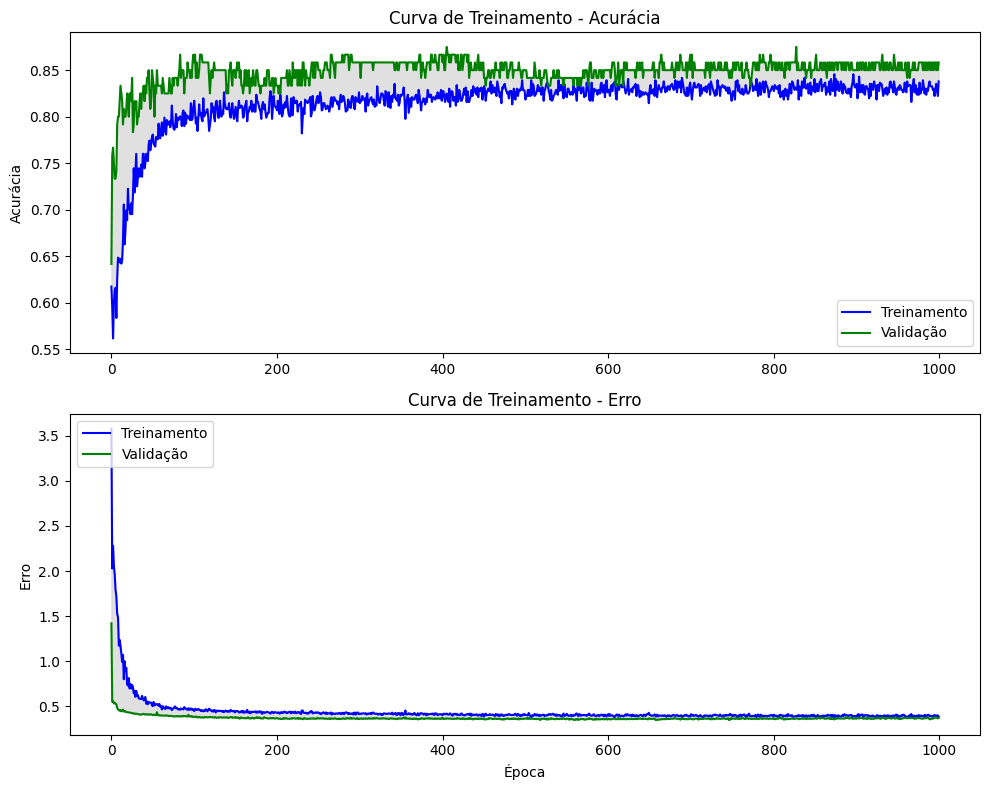

In [ ]:
import matplotlib.pyplot as plt

# Crie uma figura com dois subplots (um para acurácia e outro para erro)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Acurácia
ax1.plot(history.history['accuracy'], label='Treinamento', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validação', color='green')
ax1.fill_between(range(len(history.history['accuracy'])), history.history['accuracy'], history.history['val_accuracy'], color='lightgray', alpha=0.7)
ax1.set_title('Curva de Treinamento - Acurácia')
ax1.set_ylabel('Acurácia')
ax1.legend(loc='lower right')

# Gráfico de Erro
ax2.plot(history.history['loss'], label='Treinamento', color='blue')
ax2.plot(history.history['val_loss'], label='Validação', color='green')
ax2.fill_between(range(len(history.history['loss'])), history.history['loss'], history.history['val_loss'], color='lightgray', alpha=0.7)
ax2.set_title('Curva de Treinamento - Erro')
ax2.set_ylabel('Erro')
ax2.set_xlabel('Época')
ax2.legend(loc='upper left')

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os gráficos
plt.show()


25/25 [==============================] - 0s 3ms/step
Acurácia no Dataset de Treinamento: 0.8404669260700389 



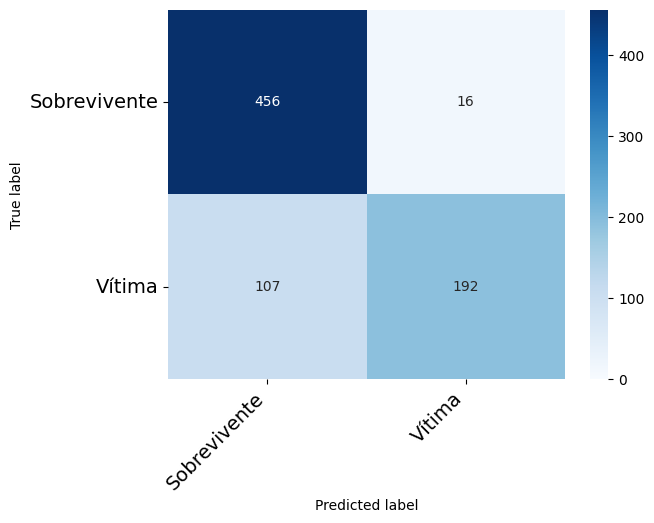

4/4 [==============================] - 0s 3ms/step
Acurácia no Dataset de Validação: 0.8583333333333333 



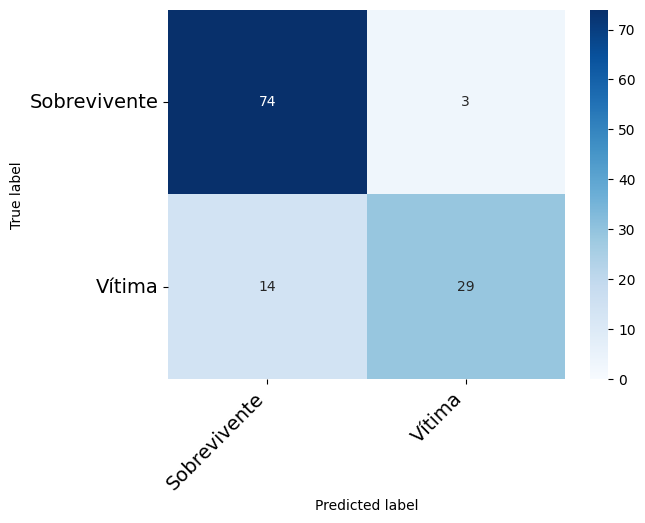

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

# Avaliação no conjunto de treinamento
y_train_np = y_train.to_numpy()
X_train_np = X_train.to_numpy()
y_train_pred = np.round(model.predict(X_train_np))

print("Acurácia no Dataset de Treinamento:", accuracy_score(y_train_np, y_train_pred), "\r\n")

confusionMatrixDF = pd.DataFrame(confusion_matrix(y_train_np, y_train_pred),
                                 index=('Sobrevivente', 'Vítima'), columns=('Sobrevivente', 'Vítima'))

heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues", vmin=0)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Avaliação no conjunto de validação
y_val_np = y_val.to_numpy()
X_val_np = X_val.to_numpy()
y_val_pred = np.round(model.predict(X_val_np))

print("Acurácia no Dataset de Validação:", accuracy_score(y_val_np, y_val_pred), "\r\n")

confusionMatrixDF = pd.DataFrame(confusion_matrix(y_val_np, y_val_pred),
                                 index=('Sobrevivente', 'Vítima'), columns=('Sobrevivente', 'Vítima'))

heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues", vmin=0)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
